In [75]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from okama.assets import Asset, AssetList, Portfolio
from okama.data import get_eod_data, get_eod_close

pd.options.display.float_format = '{:,.4f}'.format

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Индекс Мосбиржи по дням

In [2]:
moex = get_eod_data('IMOEX.INDX')

In [3]:
(moex['2020'] + 1).prod() - 1

-0.3063919339958694

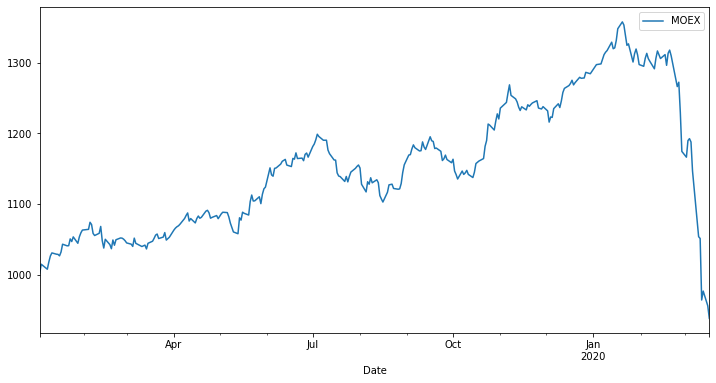

In [26]:
wealth = 1000 * (1 + moex['2019':]).cumprod() - 1
wealth = wealth.rename('MOEX', inplace=True)
wealth.plot(figsize=(12,6), legend='MOEX')

In [24]:
wealth

Date
2020-01-03    1009.013559
2020-01-06    1009.834343
2020-01-08    1020.074439
2020-01-09    1022.707512
2020-01-10    1024.539501
2020-01-13    1033.742126
2020-01-14    1026.545496
2020-01-15    1027.484472
2020-01-16    1035.560983
2020-01-17    1048.578610
2020-01-20    1056.142951
2020-01-21    1052.629997
2020-01-22    1041.270353
2020-01-23    1030.298118
2020-01-24    1031.939686
2020-01-27    1011.899434
2020-01-28    1021.072511
2020-01-29    1026.227032
2020-01-30    1019.588535
2020-01-31    1009.105487
2020-02-03    1007.197986
2020-02-04    1015.983653
2020-02-05    1021.450072
2020-02-06    1015.681605
2020-02-07    1012.710368
2020-02-10    1004.430304
2020-02-11    1015.977087
2020-02-12    1024.083145
2020-02-13    1020.071155
2020-02-14    1015.747268
2020-02-17    1020.074439
2020-02-18    1008.251872
2020-02-19    1021.555132
2020-02-20    1025.012272
2020-02-21    1018.751335
2020-02-25     984.820143
2020-02-26     989.659483
2020-02-27     956.309406
2020-02

In [25]:
729/1000-1

-0.271

In [17]:
moex['2019':]

Date
2019-01-03    0.002646
2019-01-04    0.013007
2019-01-08   -0.006985
2019-01-09    0.010227
2019-01-10    0.008293
                ...   
2020-03-11   -0.002425
2020-03-12   -0.082828
2020-03-13    0.013112
2020-03-16   -0.021361
2020-03-17   -0.018598
Freq: D, Name: MOEX, Length: 301, dtype: float64

### Иностранные индексы

In [5]:
x = AssetList(symbols=['GDAXI.INDX', 'N225.INDX'], first_date='1995-01', last_date='1999-12-02')

ValueError: INDX is not a known namespace

In [7]:
nikkei = get_eod_data('N225.INDX')

In [8]:
nikkei.head()

Date
1965-01-06    0.004985
1965-01-07    0.008133
1965-01-08    0.009543
1965-01-09   -0.006304
1965-01-12    0.007995
Freq: D, Name: N225.INDX, dtype: float64

In [3]:
snp = get_eod_data('GSPC.INDX')
snp = snp.resample('M').apply(lambda x: (np.prod(1 + x) - 1))
snp = snp.rename('S&P500', inplace=True)

In [27]:
snp.head()

Date
1950-01    0.023409
1950-02    0.009971
1950-03    0.004065
1950-04    0.038751
1950-05    0.045657
Freq: M, Name: S&P500, dtype: float64

In [46]:
dax = get_eod_data('GDAXI.INDX')
dax = dax.resample('M').apply(lambda x: (np.prod(1 + x) - 1))
dax = dax.rename('DAX', inplace=True)

In [47]:
dax.head()

Date
1988-01   -0.068833
1988-02    0.157415
1988-03   -0.019394
1988-04   -0.012388
1988-05    0.025249
Freq: M, Name: DAX, dtype: float64

In [28]:
nikkei = get_eod_data('N225.INDX')
nikkei = nikkei.resample('M').apply(lambda x: (np.prod(1 + x) - 1))
nikkei = nikkei.rename('NIKKEI', inplace=True)

In [43]:
df = pd.concat([snp, nikkei], axis = 1, join='inner', copy='false')

In [30]:
df.head()

,S&P500,NIKKEI
Date,,
1965-01,0.033156,-0.013405
1965-02,-0.001485,-0.017714
1965-03,-0.014526,-0.070647
1965-04,0.034239,-0.003328
1965-05,-0.007743,0.000000


In [32]:
wealthindex = 1000 * (df + 1).cumprod()

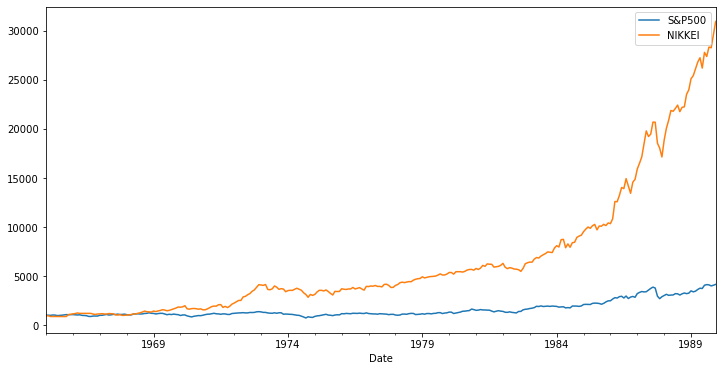

In [39]:
wealthindex[:'1989'].plot(figsize=(12,6));

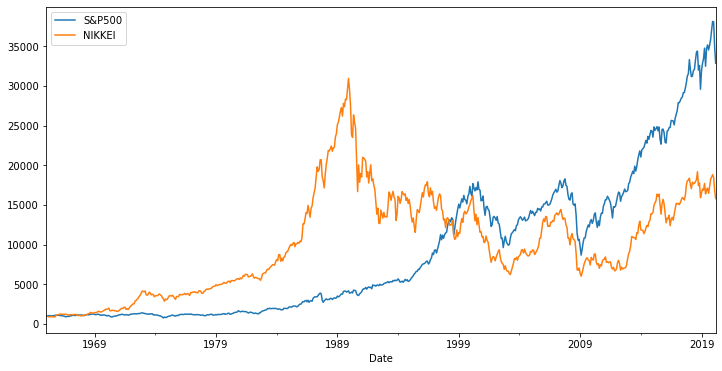

In [40]:
wealthindex.plot(figsize=(12,6));

In [48]:
df1 = pd.concat([snp, dax], axis = 1, join='inner', copy='false')

In [49]:
wealthindex1 = 1000 * (df1 + 1).cumprod()

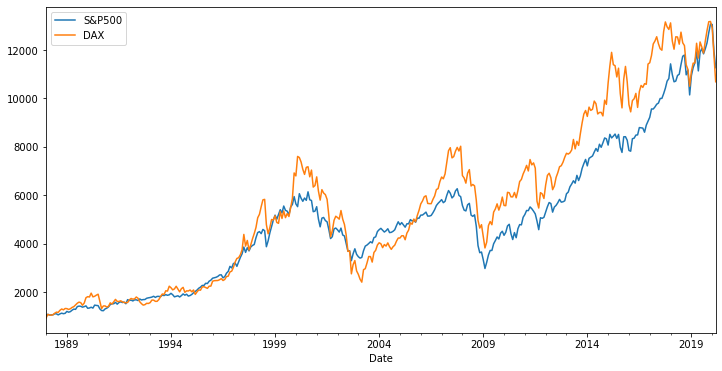

In [51]:
wealthindex1.plot(figsize=(12,6))

### Великобритания 

FTSE All-Share

In [5]:
ftse = get_eod_data('FTAS.INDX')
ftse = ftse.resample('M').apply(lambda x: (np.prod(1 + x) - 1))
ftse = ftse.rename('FTSE', inplace=True)

In [13]:
ftse.head()

Date
2012-05   -0.014683
2012-06    0.050409
2012-07    0.012256
2012-08    0.020865
2012-09    0.007215
Freq: M, Name: FTSE, dtype: float64

In [8]:
df = pd.concat([snp, ftse], axis = 1, join='inner', copy='false')

In [9]:
wealthindex_ftse = 1000 * (df + 1).cumprod()

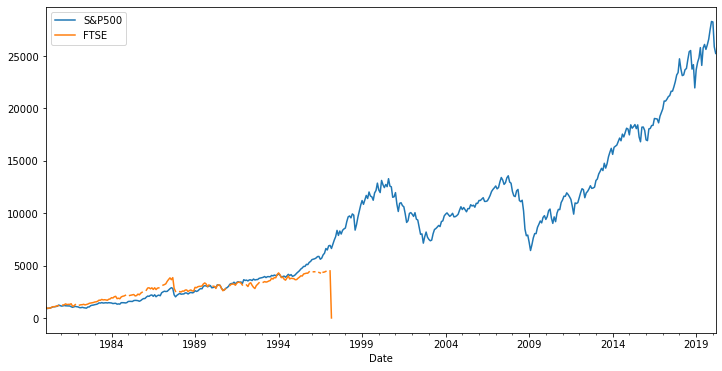

In [10]:
wealthindex_ftse.plot(figsize=(12,6))

In [18]:
ftse = get_eod_data('UKX.INDX')
ftse = ftse.resample('M').apply(lambda x: (np.prod(1 + x) - 1))
ftse = ftse.rename('FTSE', inplace=True)

In [19]:
ftse.head()

Date
2006-11    2796.680000
2006-12       0.036945
2007-01       0.005860
2007-02      -0.022275
2007-03       0.014497
Freq: M, Name: FTSE, dtype: float64

### Korea

In [24]:
kospi = get_eod_data('KS11.INDX')
kospi = kospi.resample('M').apply(lambda x: (np.prod(1 + x) - 1))
kospi = kospi.rename('KOSPI', inplace=True)

In [25]:
kospi.head()

Date
1983-05   -0.050079
1983-06   -0.026399
1983-07    0.020745
1983-08   -0.049288
1983-09   -0.009342
Freq: M, Name: KOSPI, dtype: float64

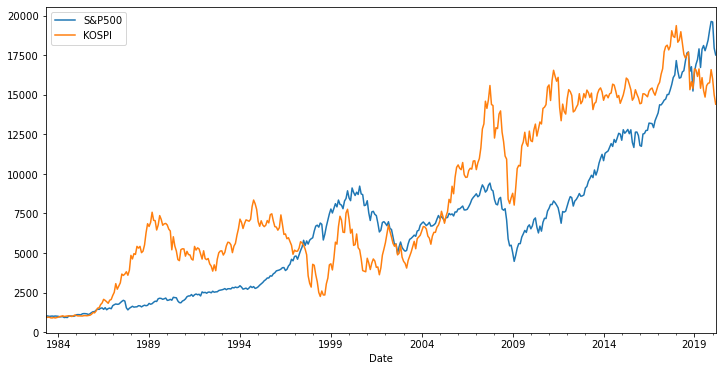

In [26]:
df = pd.concat([snp, kospi], axis = 1, join='inner', copy='false')
wealthindex_kospi = 1000 * (df + 1).cumprod()
wealthindex_kospi.plot(figsize=(12,6))

### Гонконг

HSI - Hang Seng

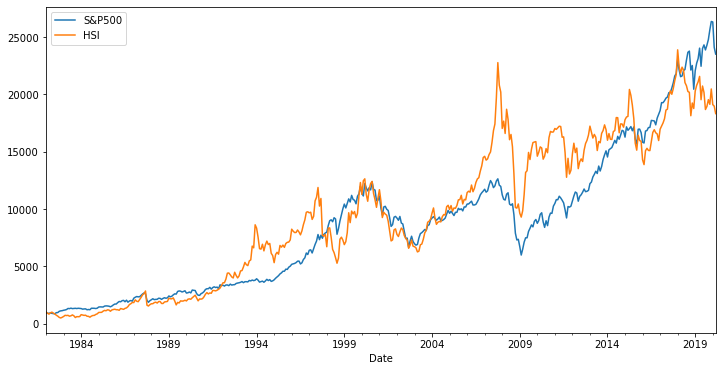

In [28]:
hang = get_eod_data('HSI.INDX').resample('M').apply(lambda x: (np.prod(1 + x) - 1))
hang = hang.rename('HSI', inplace=True)
df = pd.concat([snp, hang], axis = 1, join='inner', copy='false')
wealthindex_hang = 1000 * (df + 1).cumprod()
wealthindex_hang.plot(figsize=(12,6))

### Китай

Shanghai Composite - SSEC

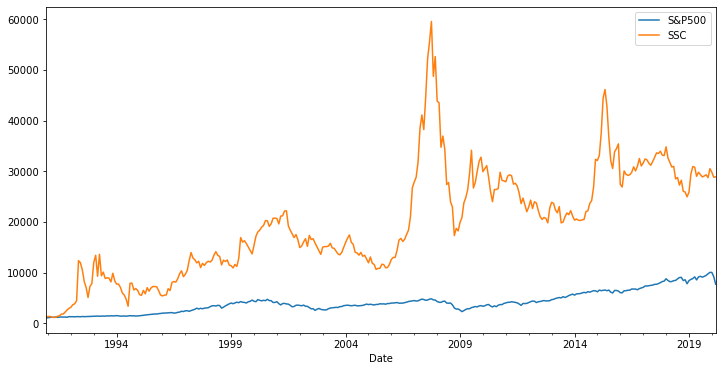

In [4]:
ssc = get_eod_data('SSEC.INDX').resample('M').apply(lambda x: (np.prod(1 + x) - 1))
ssc = ssc.rename('SSC', inplace=True)
df = pd.concat([snp, ssc], axis = 1, join='inner', copy='false')
wealthindex_ssc = 1000 * (df + 1).cumprod()
wealthindex_ssc.plot(figsize=(12,6))